# **CREDIT CARD FRAUD DETECTIONS PROJECT**

In [ ]:
# Import the Required librabries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [ ]:
# Loading a dataset to a panda Dataframe
Credit_Card_Data= pd.read_csv("/content/creditcard.csv")
Credit_Card_Data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1524,-0.340622,1.132232,1.291494,0.062313,0.016387,-0.977070,0.723755,-0.074630,-0.396655,...,-0.262948,-0.688785,-0.010937,0.334061,-0.160025,0.071779,0.245128,0.098336,5.35,0.0
1982,1525,-1.842696,1.740641,0.861526,-0.856315,-0.655376,-0.842786,0.198563,0.602764,0.455595,...,-0.213609,-0.400617,0.030013,0.512611,-0.077087,0.286218,0.586012,0.352610,1.00,0.0
1983,1525,-0.480693,0.646091,1.577264,-0.084411,-0.305958,-0.534739,0.860346,-0.028569,-0.800705,...,0.121681,0.175190,0.035986,0.557665,-0.112301,0.337154,-0.015602,0.051504,80.70,0.0
1984,1525,-0.342132,1.091125,1.282729,0.068076,-0.022498,-0.996727,0.676304,-0.042250,-0.312036,...,-0.269850,-0.734148,-0.007354,0.319161,-0.179146,0.073683,0.241932,0.097139,3.59,0.0


In [ ]:
# load the first ten transction
Credit_Card_Data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [ ]:
# load last five row transcation
Credit_Card_Data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1981,1524,-0.340622,1.132232,1.291494,0.062313,0.016387,-0.977070,0.723755,-0.074630,-0.396655,...,-0.262948,-0.688785,-0.010937,0.334061,-0.160025,0.071779,0.245128,0.098336,5.35,0.0
1982,1525,-1.842696,1.740641,0.861526,-0.856315,-0.655376,-0.842786,0.198563,0.602764,0.455595,...,-0.213609,-0.400617,0.030013,0.512611,-0.077087,0.286218,0.586012,0.352610,1.00,0.0
1983,1525,-0.480693,0.646091,1.577264,-0.084411,-0.305958,-0.534739,0.860346,-0.028569,-0.800705,...,0.121681,0.175190,0.035986,0.557665,-0.112301,0.337154,-0.015602,0.051504,80.70,0.0
1984,1525,-0.342132,1.091125,1.282729,0.068076,-0.022498,-0.996727,0.676304,-0.042250,-0.312036,...,-0.269850,-0.734148,-0.007354,0.319161,-0.179146,0.073683,0.241932,0.097139,3.59,0.0
1985,1526,-0.854343,1.382948,1.278665,2.914727,-0.183139,-0.349329,0.274566,0.435277,-1.576521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Credit_Card_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

In [ ]:
# Finding the null values in each column
Credit_Card_Data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# Distribution of legit transcation and fraudulent transcation
Credit_Card_Data['Class'].value_counts()


,count
Class,
0.0,1983
1.0,2


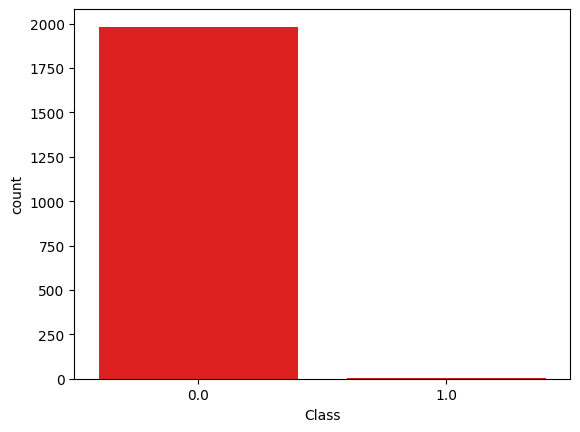

In [ ]:

sns.countplot(x='Class', data=Credit_Card_Data,color="red")
plt.show()

In [ ]:
Credit_Card_Data.count()

,0
Time,1986
V1,1986
V2,1986
V3,1986
V4,1986
V5,1986
V6,1986
V7,1986
V8,1986
V9,1986


In [ ]:
#checking null values
Credit_Card_Data['Class'].isna().sum()

np.int64(1)

Dataset is unblanced
<'yes'>--Normal Transcation
<'No'>--fruad Transcation
# Separating the data for analysis

In [ ]:
Legit= Credit_Card_Data[Credit_Card_Data.Class==0]
Fraud= Credit_Card_Data[Credit_Card_Data.Class==1]

In [ ]:
Legit.shape


(1983, 31)

In [ ]:
Fraud.shape

(2, 31)

In [ ]:
#Statistical measure of data
Legit['Amount'].describe()

,Amount
count,1983.000000
mean,68.404892
std,241.572682
min,0.000000
25%,4.950000
50%,15.090000
75%,63.285000
max,7712.430000


In [ ]:
Fraud['Amount'].describe()

,Amount
count,2.000000
mean,264.500000
std,374.059487
min,0.000000
25%,132.250000
50%,264.500000
75%,396.750000
max,529.000000


In [ ]:
#comparing the two transcation using groupby()method
Credit_Card_Data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,760.974786,-0.281494,0.267200,0.848906,0.146804,-0.077904,0.051713,0.139533,-0.059771,0.014492,...,0.056618,-0.012217,-0.144666,-0.043548,0.013865,0.108318,0.049441,0.027220,-0.001966,68.404892
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


**UNDER SAMPLING**



Build a Sample Dataset containing similiar distribution and fradulent transcation

--number of fraudlent transcation-->25

In [ ]:
Legit_sample=Legit.sample(n=25)

In [ ]:
#Concatenating the two dataframe
new_dataset=pd.concat([Legit_sample,Fraud],axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1131,878,-2.512192,0.317838,1.270333,1.214258,1.179903,-0.412233,1.002716,-0.774680,1.656602,...,-0.655258,0.242368,-0.135074,0.104261,0.211102,-0.287307,0.335129,0.328212,18.80,0.0
1871,1443,1.233222,-0.660301,-0.248275,-2.152826,-0.603382,-0.615240,-0.256466,0.101839,2.017233,...,-0.106684,-0.168258,-0.098863,-0.332949,0.629756,-0.809705,0.057508,0.000892,22.10,0.0
524,388,0.199489,0.705636,1.398115,1.219647,0.149196,-0.698932,-0.551006,-0.872024,-0.370324,...,0.640890,-0.701341,-0.757939,0.639510,0.147696,-0.544986,0.274528,0.280555,9.99,0.0
37,27,-1.452187,1.765124,0.611669,1.176825,-0.445980,0.246826,-0.257566,1.092472,-0.607524,...,0.082280,0.325782,-0.069107,0.020962,-0.044668,-0.243441,0.149180,0.120557,1.80,0.0
1211,938,-2.252996,0.164611,0.618369,-0.332608,-0.122234,-1.115583,-0.431424,0.952571,-0.429523,...,0.027982,-0.435522,-0.180991,0.362822,-0.269595,0.248303,-0.077964,-0.113453,1.00,0.0


In [ ]:
# Dropping non-numeric columns in dataset
data_numeric=new_dataset._get_numeric_data()
data_numeric

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1131,878,-2.512192,0.317838,1.270333,1.214258,1.179903,-0.412233,1.002716,-0.774680,1.656602,...,-0.655258,0.242368,-0.135074,0.104261,0.211102,-0.287307,0.335129,0.328212,18.80,0.0
1871,1443,1.233222,-0.660301,-0.248275,-2.152826,-0.603382,-0.615240,-0.256466,0.101839,2.017233,...,-0.106684,-0.168258,-0.098863,-0.332949,0.629756,-0.809705,0.057508,0.000892,22.10,0.0
524,388,0.199489,0.705636,1.398115,1.219647,0.149196,-0.698932,-0.551006,-0.872024,-0.370324,...,0.640890,-0.701341,-0.757939,0.639510,0.147696,-0.544986,0.274528,0.280555,9.99,0.0
37,27,-1.452187,1.765124,0.611669,1.176825,-0.445980,0.246826,-0.257566,1.092472,-0.607524,...,0.082280,0.325782,-0.069107,0.020962,-0.044668,-0.243441,0.149180,0.120557,1.80,0.0
1211,938,-2.252996,0.164611,0.618369,-0.332608,-0.122234,-1.115583,-0.431424,0.952571,-0.429523,...,0.027982,-0.435522,-0.180991,0.362822,-0.269595,0.248303,-0.077964,-0.113453,1.00,0.0
1047,792,-2.496329,1.157444,3.770236,-0.230246,0.007065,0.506341,1.629152,-2.267294,4.304904,...,-0.594643,0.105965,-0.558559,0.732507,0.069949,-0.030734,-2.887661,-1.683655,3.37,0.0
860,654,-0.833568,0.606174,-0.051329,-2.091447,0.968764,-0.030220,0.887288,0.099009,0.834622,...,0.320782,1.239559,0.192074,-0.621025,-0.843584,-0.835690,0.164384,0.274361,9.90,0.0
1631,1263,-0.385518,0.796748,0.810256,-0.587938,0.917215,0.842249,0.382334,0.406126,-0.340270,...,-0.277180,-0.793973,-0.204252,-1.765507,-0.110808,0.195068,0.267256,0.087233,0.99,0.0
396,288,-0.598820,0.073254,-0.113786,-2.315189,1.644382,4.389522,3.174203,-1.032390,0.673033,...,-0.588539,-0.496473,-0.276571,1.069602,-0.629078,0.401503,-1.346578,-1.228507,380.95,0.0
1296,1009,-0.409176,1.091564,1.497338,-0.048508,0.283494,-0.944229,1.103589,-0.502388,0.092823,...,-0.397234,-0.661880,-0.075379,0.325401,-0.159293,0.020104,0.024507,-0.281598,9.99,0.0


In [ ]:
data_numeric['Class'].value_counts()

,count
Class,
0.0,25
1.0,2


Spliting the data into features and target


In [ ]:
X=data_numeric.drop(columns='Class',axis=1)
Y=data_numeric['Class']

In [ ]:
print(X)
print(Y)

      Time        V1        V2        V3        V4        V5        V6  \
1131   878 -2.512192  0.317838  1.270333  1.214258  1.179903 -0.412233   
1871  1443  1.233222 -0.660301 -0.248275 -2.152826 -0.603382 -0.615240   
524    388  0.199489  0.705636  1.398115  1.219647  0.149196 -0.698932   
37      27 -1.452187  1.765124  0.611669  1.176825 -0.445980  0.246826   
1211   938 -2.252996  0.164611  0.618369 -0.332608 -0.122234 -1.115583   
1047   792 -2.496329  1.157444  3.770236 -0.230246  0.007065  0.506341   
860    654 -0.833568  0.606174 -0.051329 -2.091447  0.968764 -0.030220   
1631  1263 -0.385518  0.796748  0.810256 -0.587938  0.917215  0.842249   
396    288 -0.598820  0.073254 -0.113786 -2.315189  1.644382  4.389522   
1296  1009 -0.409176  1.091564  1.497338 -0.048508  0.283494 -0.944229   
1310  1028 -2.871645  1.738809 -1.081047 -2.875219 -0.034319 -0.677807   
1120   871 -1.366797 -0.381816  2.909364  0.452824  0.646125  0.074504   
345    256 -1.377245  0.714823  2.5075

**Spliting the Data into Training Data and Testing Data**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(27, 30) (21, 30) (6, 30)


Model Training--Using Logistic Regression

In [ ]:
model=LogisticRegression()


In [ ]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
647,490,0.716662,-1.097812,0.629443,1.939510,-0.494739,1.819965,-0.624840,0.482657,0.783612,...,0.388818,-0.263286,-0.978693,-0.359244,-1.332020,0.296656,0.937425,-0.068357,0.032839,254.41
723,547,1.066851,-0.464679,1.984353,1.521834,-1.287325,1.113014,-1.314876,0.528953,0.249078,...,-0.029287,-0.080174,0.115724,0.149055,0.419153,-0.364680,3.087444,-0.137987,-0.016174,1.48
396,288,-0.598820,0.073254,-0.113786,-2.315189,1.644382,4.389522,3.174203,-1.032390,0.673033,...,-0.104450,-0.588539,-0.496473,-0.276571,1.069602,-0.629078,0.401503,-1.346578,-1.228507,380.95
256,180,1.294033,-0.762809,0.111245,-0.535421,-1.134396,-0.937699,-0.477581,-0.041694,-0.685741,...,-0.022437,0.211623,0.432048,-0.156996,0.526055,0.639295,-0.091242,-0.034940,-0.002710,48.00
1705,1317,-1.401282,1.441452,1.084768,-0.750454,-0.491807,-0.793817,0.267991,0.537277,-0.038416,...,0.156093,-0.146903,-0.294730,-0.004162,0.541832,-0.154576,0.274771,0.382995,0.230803,1.00
1120,871,-1.366797,-0.381816,2.909364,0.452824,0.646125,0.074504,-0.043701,-0.323218,0.698467,...,0.314913,-0.219791,0.120994,-0.434589,0.063623,0.059021,0.365410,-0.447739,-0.363027,15.30


In [ ]:
Y_train

,Class
541,1.0
311,0.0
345,0.0
1631,0.0
364,0.0
1310,0.0
1131,0.0
1258,0.0
1211,0.0
1047,0.0


Train the Logistic Regression Model with Training Data

In [ ]:
# Select only numeric columns for training
X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)

model = LogisticRegression()
model.fit(X_train_numeric, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Model Evalution----Finding the accuracy score
#accuracy on Training Data
X_train_prediction = model.predict(X_train_numeric)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on Training Data:", training_data_accuracy)

Accuracy on Training Data: 1.0


In [ ]:
# Accuracay on Test Data
X_test_prediction=model.predict(X_test_numeric)
test_data_accuracy= accuracy_score(X_test_prediction,Y_test)
print("accuracy score of test data:",test_data_accuracy)

accuracy score of test data: 1.0
